Problem Statement:-
The project is about a bike rental company who has its historical data. The goal is to build a models which predicts the count of bike rentals based on the seasonal and environmental settings. These predicted values would help the business to meet the demand on those particular days by being prepared for high demand of bikes during peak periods.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
from random import randrange,uniform
from scipy import stats
from sklearn.metrics import r2_score

In [2]:
# Set working directory
os.chdir("C:/Users/User/Desktop/edwisor/python/")
os.getcwd()

'C:\\Users\\User\\Desktop\\edwisor\\python'

In [3]:
print(os.listdir(os.getcwd()))

['day.csv', 'practice']


In [4]:
# Load Data in .csv format
Df_Day = pd.read_csv("day.csv")

In [5]:
Df_Day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


## EXPLORATORY DATA ANALYSIS

In [6]:
# To check the data Types of Varaibles

Df_Day.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [7]:
#Shape of the data
Df_Day.shape

(731, 16)

The dataset contains 731 observations and 16 attributes.

In [8]:
# To get columns names 

Df_Day.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [9]:
# To check the unique values which present in each variable

Df_Day.nunique()

instant       731
dteday        731
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          499
atemp         690
hum           595
windspeed     650
casual        606
registered    679
cnt           696
dtype: int64

In [10]:
##Dropping the variables which are not necessary for our model
#variable "instant" can be dropped as it simply represents the index number
# casual and registered variables can be removed, as these two sums to dependent variable count and which is what we need to predict
# Variable "dteday" can be ignored as the output is not based on time series analysis

Df_Day = Df_Day.drop(Df_Day.columns[[0, 1, 13, 14]], axis = "columns")

Df_Day.shape

(731, 12)

In [11]:
#Classifying into numeric and categorical variables and saving those in a specific array

numeric_var = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

categorical_var = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

## DATA PRE PROCESSING

### Missing Value Analysis

In [12]:
#sum of the missing values 

Df_Day.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

No missing values found

### Outlier Analysis

temp


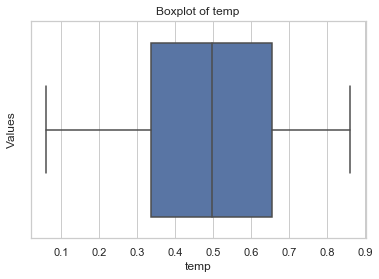

atemp


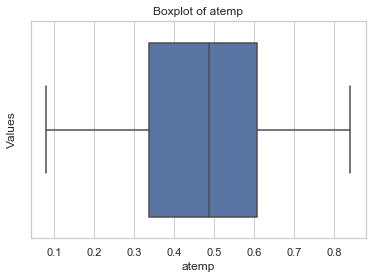

hum


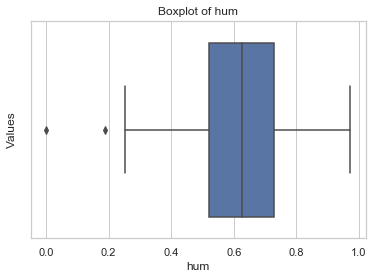

windspeed


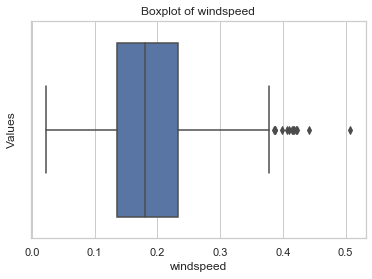

cnt


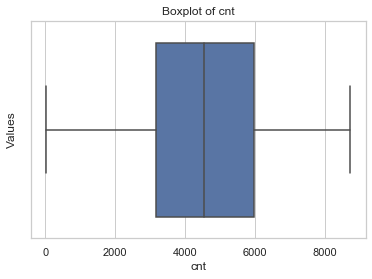

In [13]:
for i in numeric_var:
    print(i)
    sns.set(style="whitegrid")
    sns.boxplot(y = Df_Day[i], orient="h")
    plt.xlabel(i)
    plt.ylabel("Values")
    plt.title("Boxplot of " + i)
    plt.show()

outliers are found in windspeed and humidity variables.

In [14]:
# To identify the outliers present 
for i in numeric_var:
    print(i)
    q75, q25 = np.percentile(Df_Day.loc[:,i], [75, 25]) # Divide data into 75%quantile and 25%quantile.
    iqr = q75 - q25
    Innerfence = q25 - (iqr*1.5)
    Upperfence = q75 + (iqr*1.5)
    print("Innerfence= "+str(Innerfence))
    print("Upperfence= "+str(Upperfence)) 
    print("IQR ="+str(iqr))
    

# To replace outliers with NAN

    Df_Day.loc[Df_Day[i]<Innerfence, i] = np.nan
    Df_Day.loc[Df_Day[i]>Upperfence, i] = np.nan

temp
Innerfence= -0.14041600000000015
Upperfence= 1.1329160000000003
IQR =0.3183330000000001
atemp
Innerfence= -0.06829675000000018
Upperfence= 1.0147412500000002
IQR =0.2707595000000001
hum
Innerfence= 0.20468725
Upperfence= 1.0455212500000002
IQR =0.21020850000000002
windspeed
Innerfence= -0.012446750000000034
Upperfence= 0.38061125
IQR =0.0982645
cnt
Innerfence= -1054.0
Upperfence= 10162.0
IQR =2804.0


In [15]:
Df_Day.isnull().sum()

season         0
yr             0
mnth           0
holiday        0
weekday        0
workingday     0
weathersit     0
temp           0
atemp          0
hum            2
windspeed     13
cnt            0
dtype: int64

Total 15 outliers found, out of which 13 are present in windspeed and remaining 2 in humidity variable.

In [16]:
#  Now we impute the values, by the help of median method.

Df_Day['hum'] = Df_Day['hum'].fillna(Df_Day['hum'].median())
Df_Day['windspeed'] = Df_Day['windspeed'].fillna(Df_Day['windspeed'].median())

In [17]:
# To check the imputation result

Df_Day.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

## DATA UNDERSTANDING

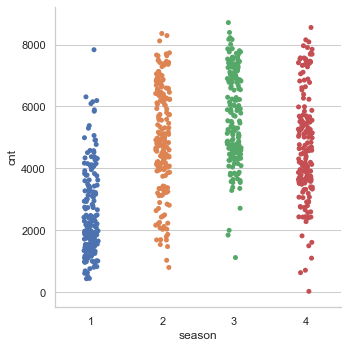

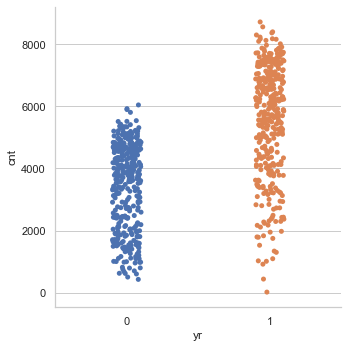

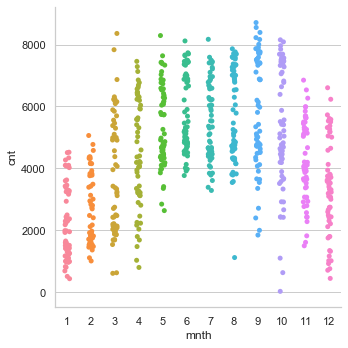

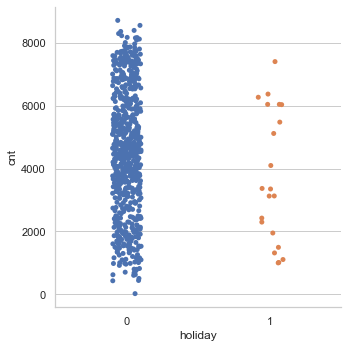

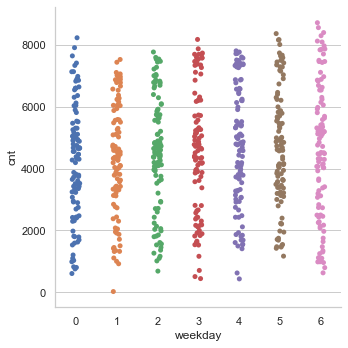

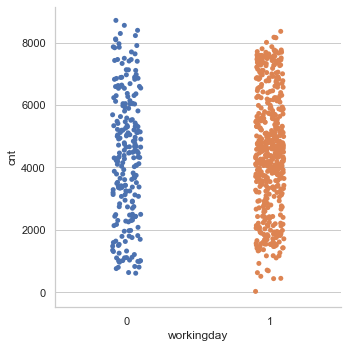

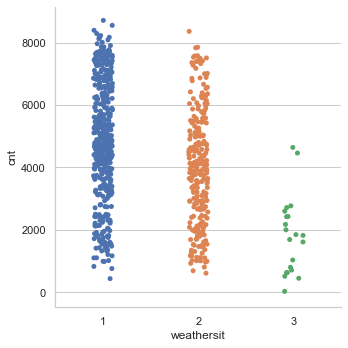

In [18]:
for i in categorical_var:
    sns.catplot(x = i, y = "cnt", data=Df_Day)
   
  

We can observe from the cat plots that
In Season 2, 3 and 4 has the highest count compared to season 1
In Year 1 has high count than 0 (0= 2011, 1= 2012)
In Months 1,2,11 and 12 has got comparitatively less count
On holidays the count is higher compared non-holidays
In weekdays, 0 and 6 has the highest count
In weather, 1 has the highest count

Text(0.5, 0, 'Windspeed')

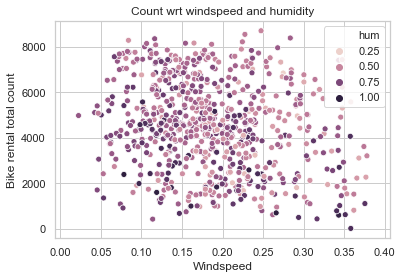

In [19]:
scatter_plot1 = sns.scatterplot(x="windspeed", y="cnt", hue="hum", data= Df_Day)

plt.title("Count wrt windspeed and humidity")
plt.ylabel("Bike rental total count")
plt.xlabel("Windspeed")


From the above scatter plot it is observed that in Count v/s windspeed and humidity, Count is High in ranges, windspeed 0.10 to 0.25  and humidity 0.5 to 0.75

## FEATURE SELECTION

In [20]:
# Correlation Analysis to find varaibles which can be excluded

Df_Day_cor = Df_Day.loc[:, numeric_var]
correlation_result = Df_Day_cor.corr()
print(correlation_result)

               temp     atemp       hum  windspeed       cnt
temp       1.000000  0.991702  0.123723  -0.138937  0.627494
atemp      0.991702  1.000000  0.137312  -0.164157  0.631066
hum        0.123723  0.137312  1.000000  -0.200237 -0.121454
windspeed -0.138937 -0.164157 -0.200237   1.000000 -0.215203
cnt        0.627494  0.631066 -0.121454  -0.215203  1.000000


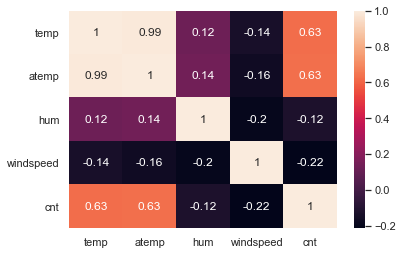

In [21]:
heatmap = sns.heatmap(correlation_result, annot=True)

It is found that temperature and atemp are highly correlated with each other.

In [22]:
#Anova test to find varaibles which can be dropped

import statsmodels.api as sm
from statsmodels.formula.api import ols

for i in categorical_var:
    mod = ols('cnt' + '~' + i, data = Df_Day).fit()
    anova_table = sm.stats.anova_lm(mod, typ = 2)
    print(anova_table)

                sum_sq     df           F        PR(>F)
season    4.517974e+08    1.0  143.967653  2.133997e-30
Residual  2.287738e+09  729.0         NaN           NaN
                sum_sq     df           F        PR(>F)
yr        8.798289e+08    1.0  344.890586  2.483540e-63
Residual  1.859706e+09  729.0         NaN           NaN
                sum_sq     df          F        PR(>F)
mnth      2.147445e+08    1.0  62.004625  1.243112e-14
Residual  2.524791e+09  729.0        NaN           NaN
                sum_sq     df         F    PR(>F)
holiday   1.279749e+07    1.0  3.421441  0.064759
Residual  2.726738e+09  729.0       NaN       NaN
                sum_sq     df         F    PR(>F)
weekday   1.246109e+07    1.0  3.331091  0.068391
Residual  2.727074e+09  729.0       NaN       NaN
                  sum_sq     df         F    PR(>F)
workingday  1.024604e+07    1.0  2.736742  0.098495
Residual    2.729289e+09  729.0       NaN       NaN
                  sum_sq     df          F 

It is found that holiday, weekday and workingday has p value > 0.05, by which, we accept null hypothesis.

In [23]:
#Dimension Reduction. Drop atemp, holiday, weekday and working day

Df_Day = Df_Day.drop(['atemp', 'holiday', 'weekday', 'workingday'], axis = "columns")
Df_Day.shape

(731, 8)

In [24]:
#Final Variables- the cleaned data

numeric_var = ["temp","hum","windspeed","cnt"]   # numeric variables

categorical_var = ["season", "yr", "mnth", "weathersit"]   # categorical variables

### FEATURE SCALING

temp


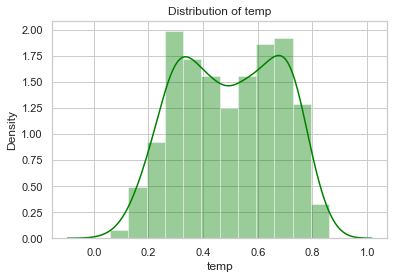

hum


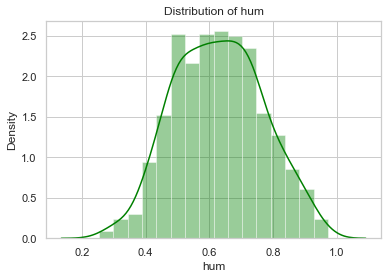

windspeed


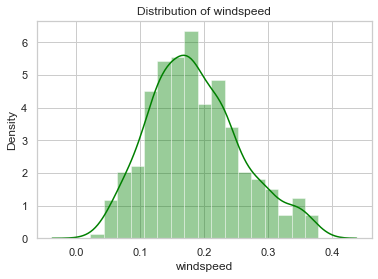

cnt


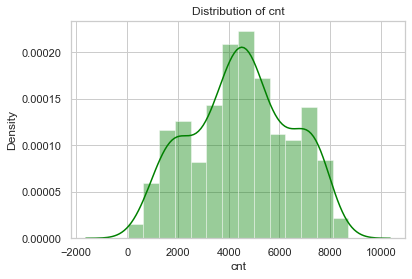

In [25]:
# To check whether the variables are normally distributed 
for i in numeric_var:
    print(i)
    sns.distplot(Df_Day[i], bins = 'auto', color = 'green')
    plt.title("Distribution of "+i)
    plt.ylabel("Density")
    plt.show()

Distributions are approximately symmetric

In [26]:
Df_Day.describe()

,season,yr,mnth,weathersit,temp,hum,windspeed,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,0.500684,6.519836,1.395349,0.495385,0.629354,0.186257,4504.348837
std,1.110807,0.500342,3.451913,0.544894,0.183051,0.139566,0.071156,1937.211452
min,1.000000,0.000000,1.000000,1.000000,0.059130,0.254167,0.022392,22.000000
25%,2.000000,0.000000,4.000000,1.000000,0.337083,0.522291,0.134950,3152.000000
50%,3.000000,1.000000,7.000000,1.000000,0.498333,0.627500,0.178802,4548.000000
75%,3.000000,1.000000,10.000000,2.000000,0.655417,0.730209,0.229786,5956.000000
max,4.000000,1.000000,12.000000,3.000000,0.861667,0.972500,0.378108,8714.000000


## MODEL DEVELOPMENT

In [27]:
df = Df_Day.copy()
Df_Day = df.copy()

In [28]:
# Creating dummy variables

Df_Day = pd.get_dummies(Df_Day, columns = categorical_var) 

Df_Day.shape

(731, 25)

In [29]:
Df_Day.head()

,temp,hum,windspeed,cnt,season_1,season_2,season_3,season_4,yr_0,yr_1,...,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weathersit_1,weathersit_2,weathersit_3
0,0.344167,0.805833,0.160446,985.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,0.363478,0.696087,0.248539,801.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,0.196364,0.437273,0.248309,1349.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0.200000,0.590435,0.160296,1562.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0.226957,0.436957,0.186900,1600.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [30]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error
from scipy.stats.stats import pearsonr 

In [31]:
#define the Error Metrics.

def MAPE(y_actual, y_predicted):
    MAPE = np.mean(np.abs(y_actual-y_predicted)/y_actual)*100
    return MAPE

def Rsquare(y_actual, y_predicted):
    Rsquare = np.corrcoef(y_actual,y_predicted)**2
    return Rsquare

In [32]:
#predictors and target variables

X = Df_Day.drop(['cnt'], axis = "columns")
y = Df_Day['cnt']

In [33]:
#divide the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

## DECISION TREE

In [34]:
from sklearn.tree import DecisionTreeRegressor
DTModel = DecisionTreeRegressor(max_depth=2).fit(X_train,y_train)

# Prediction

DTTest = DTModel.predict(X_test)

# MAPE
DTMape_Test = MAPE(y_test, DTTest)


# Rsquare 

DTR2_Test = Rsquare(y_test, DTTest)

DTR2_Test1 = DTR2_Test.ravel()

DTR2_Test2 = float(DTR2_Test1[1])


print("MAPE ="+str(DTMape_Test))
print("Accuracy =" + str(100 - DTMape_Test))
print("Rsquare ="+str(DTR2_Test2))

MAPE =36.94809301452646
Accuracy =63.05190698547354
Rsquare =0.6544606873373328


In [35]:
DTModel

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

## RANDOM FOREST

In [36]:
from sklearn.ensemble import RandomForestRegressor

RFModel = RandomForestRegressor(n_estimators=100).fit(X_train,y_train)

# Predictions
RFTest = RFModel.predict(X_test)

# MAPE 
RFMape_Test = MAPE(y_test, RFTest)

# Rsquare - Test Data

RFR2_Test = Rsquare(y_test, RFTest)

RFR2_Test1 = RFR2_Test.ravel()

RFR2_Test2 = float(RFR2_Test1[1])

print("MAPE ="+str(RFMape_Test))
print("Accuracy =" + str(100 - RFMape_Test))
print("Rsquare ="+str(RFR2_Test2))

MAPE =20.66029546223116
Accuracy =79.33970453776884
Rsquare =0.8855255589120425


In [37]:
RFModel

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

# LINEAR REGRESSION MODEL

In [38]:
import statsmodels.api as sm
LRModel= sm.OLS(y_train, X_train).fit()
print(LRModel.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     140.2
Date:                Tue, 18 Aug 2020   Prob (F-statistic):          1.63e-203
Time:                        22:52:21   Log-Likelihood:                -4716.2
No. Observations:                 584   AIC:                             9474.
Df Residuals:                     563   BIC:                             9566.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
temp          4807.6605    477.418     10.070   

In [39]:
#Prediction

LRTest = LRModel.predict(X_test)

#MAPE

LRMape_Test = MAPE(y_test, LRTest)


#Rsquare -Test Data

LRR2_Test = Rsquare(y_test, LRTest)

LRR2_Test1 = LRR2_Test.ravel()

LRR2_Test2 = float(LRR2_Test1[1])


print("MAPE ="+str(LRMape_Test))
print("Accuracy =" + str(100 - LRMape_Test))
print("Rsquare ="+str(LRR2_Test2))



MAPE =18.800696038206947
Accuracy =81.19930396179305
Rsquare =0.843604001990494


###  SAMPLE INPUT OUTPUT

In [40]:
LRModel.predict([[0.6, 0.7, 0.6,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0]])

array([1531.00327775])

In [41]:
#Putting all the variables humidity, weather, temperature , season, month and year,
#it is found that for those particular input we got above result